In [52]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

beers = pd .read_csv('beer_reviews.csv',usecols=['brewery_name','beer_name','review_time','review_overall' ,'review_aroma','review_appearance','review_palate','review_taste','beer_beerid'])

beers.head()

,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_name,beer_beerid
0,Vecchio Birraio,1234817823,1.5,2.0,2.5,1.5,1.5,Sausa Weizen,47986
1,Vecchio Birraio,1235915097,3.0,2.5,3.0,3.0,3.0,Red Moon,48213
2,Vecchio Birraio,1235916604,3.0,2.5,3.0,3.0,3.0,Black Horse Black Beer,48215
3,Vecchio Birraio,1234725145,3.0,3.0,3.5,2.5,3.0,Sausa Pils,47969
4,Caldera Brewing Company,1293735206,4.0,4.5,4.0,4.0,4.5,Cauldron DIPA,64883


In [36]:
%%html
<h1> 1) Which is the best beer based on reviews</h1>


In [53]:
best_review_d=beers.set_index(beers['beer_name'],drop=False)
best_review_d=beers.groupby(beers['beer_name'])
best_review_d=best_review_d.aggregate(np.mean)
best_review=best_review_d.ix[beers.review_overall.idxmax()]
i=beers.index.get_loc(best_review.beer_beerid)
print("The best beer based on reviews is ", beers.get_value(i,'beer_name'), "with total rate : ",best_review.review_overall)


The best beer based on reviews is  Smooth Hoperator with total rate :  5.0


In [38]:
%%html
<h1> 2) Which is the best brewbery based on reviews </h1>


In [39]:
print("The best brewery based on reviews is ", beers.get_value(i,'brewery_name'), "with total rate : ",best_review.review_overall)

The best brewery based on reviews is  Stoudts Brewing Co. with total rate :  5.0


In [40]:
%%html
<h1>3) Is there a difference between weekends and normal days for reviews</h1>

In [54]:
from time import gmtime, strftime 
from datetime import date
def timestampToDate(timestamp, datePattern = "%b %d %Y %H:%M"):
    return strftime("%b %d %Y %H:%M", gmtime(float(timestamp))) 

dict = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}

def day_of_week(dat):
    d = date(int(dat.split()[2]),dict[dat.split()[0]],int(dat.split()[1]))
    return d.weekday()
beers['review_time_date']= beers.review_time.apply(timestampToDate)
beers['review_day_of_week'] = beers.review_time_date.apply(day_of_week)
beers['review_day_of_week']=beers.review_day_of_week.apply(int)
beers=beers.drop(['review_time_date'],axis=1)
beers.head()

,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_name,beer_beerid,review_day_of_week
0,Vecchio Birraio,1234817823,1.5,2.0,2.5,1.5,1.5,Sausa Weizen,47986,0
1,Vecchio Birraio,1235915097,3.0,2.5,3.0,3.0,3.0,Red Moon,48213,6
2,Vecchio Birraio,1235916604,3.0,2.5,3.0,3.0,3.0,Black Horse Black Beer,48215,6
3,Vecchio Birraio,1234725145,3.0,3.0,3.5,2.5,3.0,Sausa Pils,47969,6
4,Caldera Brewing Company,1293735206,4.0,4.5,4.0,4.0,4.5,Cauldron DIPA,64883,3


In [55]:
weekend_rates=beers[ (beers.review_day_of_week==6 ) | (beers.review_day_of_week == 5)].describe()
normal_days_rates = beers[ (beers.review_day_of_week !=6) & (beers.review_day_of_week !=5)].describe()
difference = weekend_rates - normal_days_rates
difference



,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_beerid,review_day_of_week
count,-6.173360e+05,-617336.000000,-617336.000000,-617336.000000,-617336.000000,-617336.000000,-617336.000000,-617336.000000
mean,3.190698e+06,0.002117,0.004621,0.006085,0.007345,0.008422,806.832993,3.537076
std,-1.937264e+06,-0.009199,-0.007779,-0.007962,-0.009923,-0.008853,244.653247,-0.923770
min,4.371840e+07,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000
25%,5.791506e+06,0.000000,0.000000,0.000000,0.000000,0.000000,112.000000,4.000000
50%,1.548325e+06,0.000000,0.000000,0.000000,0.000000,0.000000,1934.000000,4.000000
75%,1.509817e+06,0.000000,0.000000,0.000000,0.000000,0.000000,1127.000000,3.000000
max,-2.183150e+05,0.000000,0.000000,0.000000,0.000000,0.000000,-111.000000,2.000000


In [43]:
%%html
<p>Positive values obtained for mean in difference dataframe show that rates given on weekends are higher
than those given in normal days.</br>
No difference for lowest and highest rate.</br>
Negative values obtained for count shows that rates are often given on weekends </p>

In [44]:
%%html
<h1>4) Which is the most important between ( review_taste, review_palate, review_aroma, review_appearance) when calculating overall review (review_overall)</h1>

In [58]:

reviews=beers.drop(['brewery_name','review_time','beer_name','review_day_of_week','beer_beerid'],1)
reviews.corr()


,review_overall,review_aroma,review_appearance,review_palate,review_taste
review_overall,1.000000,0.616013,0.501732,0.701914,0.789816
review_aroma,0.616013,1.000000,0.561029,0.616947,0.716776
review_appearance,0.501732,0.561029,1.000000,0.566634,0.546980
review_palate,0.701914,0.616947,0.566634,1.000000,0.734135
review_taste,0.789816,0.716776,0.546980,0.734135,1.000000


In [46]:
%%html
<p>The highest value of correlation between overall review and other reviews is obtained for test review ==> The most important review  when calculating overall review is taste review </p>

In [47]:
%%html
<h1>5) which beers are getting better over time</h1>
<p>To answer this one we can may be set beer_name as an index , group beers by name and then plot each bear overall review as a fonction of time </br>
We can also group columns by beer_name , choose review_time as index and then verifie for wich beers review_overall colu is increasing. </br>
but sorry couldn't do any one of those :/ </p>

In [48]:
%%html
<h1>6) How you can identify fake reviews ? </h1>
<p> We can use lag_plot : Lag plots are used to check if a data set series is random. Random data should not exhibit any structure in the lag plot. Non-random structure implies that the underlying data are not random.
</p>


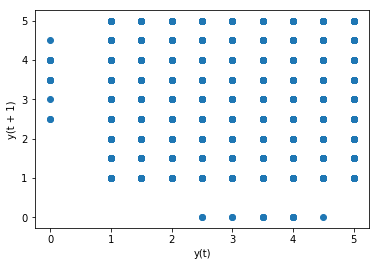

In [59]:
from pandas.tools.plotting import lag_plot
plt.figure()
lag_plot(reviews)
plt.show()

In [50]:
%%html 
<p>lag_plot dos not show random structures --> no fake reviews </p>